<a href="https://colab.research.google.com/github/stefanroata/LM-meets-DL/blob/main/SGD_Training_and_Loss_Landscape_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import copy
import torchvision
import numpy as np
import os
from tqdm import tqdm
from torchvision import transforms as T
from torchvision import models
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
import torch.optim as optim
from google.colab import drive

In [ ]:
# ONLY AVAILABLE IF WORKING INSIDE GOOGLE COLAB
# IF NOT WORKING INSIDE GOOGLE COLAB, PLEASE IGNORE THIS CELL
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/CAPSTONE/')

Mounted at /content/gdrive


In [ ]:
!nvidia-smi -L 

GPU 0: Tesla T4 (UUID: GPU-fff23c0d-b9c1-37aa-39f1-9117e20bcbcd)


In [ ]:
# dir(models)
model_ident = 'mobilenet_v2'
optimizer_name = 'SGD'
dataset_name = 'imagenetv2'


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
model = torch.hub.load('pytorch/vision:v0.6.0', model_ident, weights = None, verbose=False)

Downloading: "https://github.com/pytorch/vision/zipball/v0.6.0" to /root/.cache/torch/hub/v0.6.0.zip


In [ ]:
model.to(device)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
path_to_dataset = "imagenetv2-threshold0.7-format-val"

dataset = torchvision.datasets.ImageFolder(root=path_to_dataset,
                                            transform=T.Compose([T.Resize(256),
                                                                 T.CenterCrop(224),
                                                                 T.ToTensor(),
                                                                 T.Normalize(mean=[0.485, 0.456, 0.406],
                                                                            std=[0.229, 0.224, 0.225])]))

In [ ]:
dataset_size = len(dataset)
print("Dateset Size: ", dataset_size)
classes = dataset.classes
print("Classes: ", classes[0:10])

Dateset Size:  10000
Classes:  ['0', '1', '10', '100', '101', '102', '103', '104', '105', '106']


In [ ]:
img, label = dataset[1]
img_shape = img.shape
img_shape

torch.Size([3, 224, 224])

Label (numeric): 0
Label (textual): 0
<class 'torch.Tensor'>
torch.Size([3, 224, 224])


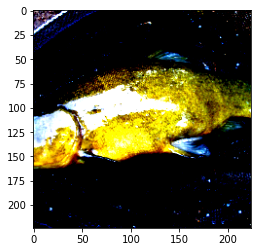

In [ ]:
img, label = dataset[0]
plt.imshow(img.permute((1, 2, 0)))
print('Label (numeric):', label)
print('Label (textual):', classes[label])
print(type(img))
print(img.size())

In [ ]:
torch.manual_seed(1234)
BATCH_SIZE= 50
train_loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)

In [ ]:
N_EPOCHS = 100
LR = 0.05
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LR)

In [ ]:
# GOOD TRAINING CODE

MAX_ACC = 0

for epoch in range(N_EPOCHS):
  running_loss = 0
  correct = 0
  total = 0
  for inputs, labels in tqdm(train_loader):
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == labels).sum().item()
    total += labels.size(0)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    running_loss += loss.item()
  
  train_loss = running_loss / len(train_loader)
  accuracy = 100 * correct / total
  print(f'Train Loss : {train_loss} ;   Accuracy : {accuracy}%')

  if accuracy > MAX_ACC:
    torch.save(model, f'{dataset_name}_{optimizer_name}_{model_ident}_best_train_acc.pt')
    MAX_ACC = accuracy

100%|██████████| 200/200 [14:44<00:00,  4.42s/it]


Train Loss : 6.976889367103577 ;   Accuracy : 0.04%


100%|██████████| 200/200 [00:43<00:00,  4.61it/s]


Train Loss : 6.932859501838684 ;   Accuracy : 0.13%


100%|██████████| 200/200 [00:43<00:00,  4.59it/s]


Train Loss : 6.824347364902496 ;   Accuracy : 0.26%


100%|██████████| 200/200 [00:43<00:00,  4.55it/s]


Train Loss : 6.677908687591553 ;   Accuracy : 0.48%


100%|██████████| 200/200 [00:44<00:00,  4.46it/s]


Train Loss : 6.523899257183075 ;   Accuracy : 0.65%


100%|██████████| 200/200 [00:44<00:00,  4.54it/s]


Train Loss : 6.373212921619415 ;   Accuracy : 0.79%


100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


Train Loss : 6.231484262943268 ;   Accuracy : 1.09%


100%|██████████| 200/200 [00:45<00:00,  4.43it/s]


Train Loss : 6.090399649143219 ;   Accuracy : 1.53%


100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


Train Loss : 5.951613903045654 ;   Accuracy : 2.06%


100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


Train Loss : 5.827754080295563 ;   Accuracy : 2.45%


100%|██████████| 200/200 [00:44<00:00,  4.53it/s]


Train Loss : 5.704802007675171 ;   Accuracy : 2.96%


100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


Train Loss : 5.575707061290741 ;   Accuracy : 3.62%


100%|██████████| 200/200 [00:46<00:00,  4.35it/s]


Train Loss : 5.455780997276306 ;   Accuracy : 4.28%


100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


Train Loss : 5.343261137008667 ;   Accuracy : 5.12%


100%|██████████| 200/200 [00:45<00:00,  4.41it/s]


Train Loss : 5.222786841392517 ;   Accuracy : 6.07%


100%|██████████| 200/200 [00:45<00:00,  4.40it/s]


Train Loss : 5.098780753612519 ;   Accuracy : 6.7%


100%|██████████| 200/200 [00:44<00:00,  4.45it/s]


Train Loss : 4.987688586711884 ;   Accuracy : 8.02%


100%|██████████| 200/200 [00:44<00:00,  4.52it/s]


Train Loss : 4.854291846752167 ;   Accuracy : 9.28%


100%|██████████| 200/200 [00:44<00:00,  4.45it/s]


Train Loss : 4.742088096141815 ;   Accuracy : 9.48%


100%|██████████| 200/200 [00:45<00:00,  4.38it/s]


Train Loss : 4.620053924322129 ;   Accuracy : 11.3%


100%|██████████| 200/200 [00:45<00:00,  4.42it/s]


Train Loss : 4.497961964607239 ;   Accuracy : 12.28%


100%|██████████| 200/200 [00:44<00:00,  4.48it/s]


Train Loss : 4.370395330190658 ;   Accuracy : 14.09%


100%|██████████| 200/200 [00:45<00:00,  4.43it/s]


Train Loss : 4.237103056907654 ;   Accuracy : 15.09%


100%|██████████| 200/200 [00:46<00:00,  4.34it/s]


Train Loss : 4.092339310646057 ;   Accuracy : 17.9%


100%|██████████| 200/200 [00:43<00:00,  4.56it/s]


Train Loss : 3.9655479156970976 ;   Accuracy : 19.55%


100%|██████████| 200/200 [00:44<00:00,  4.51it/s]


Train Loss : 3.836249487400055 ;   Accuracy : 21.13%


100%|██████████| 200/200 [00:45<00:00,  4.38it/s]


Train Loss : 3.683328300714493 ;   Accuracy : 23.14%


100%|██████████| 200/200 [00:46<00:00,  4.30it/s]


Train Loss : 3.5409346377849578 ;   Accuracy : 25.18%


100%|██████████| 200/200 [00:45<00:00,  4.44it/s]


Train Loss : 3.4016245830059053 ;   Accuracy : 28.19%


100%|██████████| 200/200 [00:44<00:00,  4.53it/s]


Train Loss : 3.2485159599781035 ;   Accuracy : 30.3%


100%|██████████| 200/200 [00:44<00:00,  4.45it/s]


Train Loss : 3.0835189485549925 ;   Accuracy : 33.43%


100%|██████████| 200/200 [00:45<00:00,  4.42it/s]


Train Loss : 2.932207112312317 ;   Accuracy : 36.1%


100%|██████████| 200/200 [00:43<00:00,  4.60it/s]


Train Loss : 2.789638636112213 ;   Accuracy : 39.15%


100%|██████████| 200/200 [00:44<00:00,  4.46it/s]


Train Loss : 2.606714168190956 ;   Accuracy : 43.27%


100%|██████████| 200/200 [00:44<00:00,  4.49it/s]


Train Loss : 2.4793846940994264 ;   Accuracy : 45.43%


100%|██████████| 200/200 [00:45<00:00,  4.37it/s]


Train Loss : 2.2753683680295946 ;   Accuracy : 50.22%


100%|██████████| 200/200 [00:44<00:00,  4.46it/s]


Train Loss : 2.1022455281019212 ;   Accuracy : 53.97%


100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


Train Loss : 1.9532493698596953 ;   Accuracy : 56.93%


100%|██████████| 200/200 [00:44<00:00,  4.52it/s]


Train Loss : 1.779426046013832 ;   Accuracy : 61.76%


100%|██████████| 200/200 [00:45<00:00,  4.40it/s]


Train Loss : 1.5932175046205521 ;   Accuracy : 66.14%


100%|██████████| 200/200 [00:44<00:00,  4.55it/s]


Train Loss : 1.4361091470718383 ;   Accuracy : 70.13%


100%|██████████| 200/200 [00:45<00:00,  4.43it/s]


Train Loss : 1.3166158652305604 ;   Accuracy : 73.09%


100%|██████████| 200/200 [00:43<00:00,  4.60it/s]


Train Loss : 1.1536605295538902 ;   Accuracy : 77.2%


100%|██████████| 200/200 [00:45<00:00,  4.42it/s]


Train Loss : 1.0324049104750157 ;   Accuracy : 79.76%


100%|██████████| 200/200 [00:45<00:00,  4.44it/s]


Train Loss : 0.8881501841545105 ;   Accuracy : 83.78%


100%|██████████| 200/200 [00:44<00:00,  4.52it/s]


Train Loss : 0.742368793040514 ;   Accuracy : 87.64%


100%|██████████| 200/200 [00:44<00:00,  4.53it/s]


Train Loss : 0.6640207284688949 ;   Accuracy : 89.48%


100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


Train Loss : 0.5511335018277168 ;   Accuracy : 91.77%


100%|██████████| 200/200 [00:44<00:00,  4.49it/s]


Train Loss : 0.4507754795253277 ;   Accuracy : 93.81%


100%|██████████| 200/200 [00:43<00:00,  4.56it/s]


Train Loss : 0.3934524263441563 ;   Accuracy : 95.17%


100%|██████████| 200/200 [00:44<00:00,  4.51it/s]


Train Loss : 0.305534118488431 ;   Accuracy : 96.87%


100%|██████████| 200/200 [00:45<00:00,  4.39it/s]


Train Loss : 0.248963539339602 ;   Accuracy : 97.66%


100%|██████████| 200/200 [00:43<00:00,  4.57it/s]


Train Loss : 0.20444543838500975 ;   Accuracy : 98.46%


100%|██████████| 200/200 [00:44<00:00,  4.49it/s]


Train Loss : 0.1828634137660265 ;   Accuracy : 98.54%


100%|██████████| 200/200 [00:44<00:00,  4.46it/s]


Train Loss : 0.15141245311126114 ;   Accuracy : 98.9%


100%|██████████| 200/200 [00:45<00:00,  4.42it/s]


Train Loss : 0.11822489228099585 ;   Accuracy : 99.51%


100%|██████████| 200/200 [00:43<00:00,  4.58it/s]


Train Loss : 0.10284526139497757 ;   Accuracy : 99.59%


100%|██████████| 200/200 [00:44<00:00,  4.50it/s]


Train Loss : 0.1030744699947536 ;   Accuracy : 99.47%


100%|██████████| 200/200 [00:44<00:00,  4.50it/s]


Train Loss : 0.09819883668795228 ;   Accuracy : 99.5%


100%|██████████| 200/200 [00:44<00:00,  4.53it/s]


Train Loss : 0.07946870889514684 ;   Accuracy : 99.69%


100%|██████████| 200/200 [00:46<00:00,  4.33it/s]


Train Loss : 0.0684181788098067 ;   Accuracy : 99.76%


100%|██████████| 200/200 [00:44<00:00,  4.49it/s]


Train Loss : 0.061095845494419335 ;   Accuracy : 99.84%


100%|██████████| 200/200 [00:44<00:00,  4.51it/s]


Train Loss : 0.061949911722913385 ;   Accuracy : 99.73%


100%|██████████| 200/200 [00:44<00:00,  4.46it/s]


Train Loss : 0.05827811854891479 ;   Accuracy : 99.77%


100%|██████████| 200/200 [00:44<00:00,  4.53it/s]


Train Loss : 0.05061139827594161 ;   Accuracy : 99.9%


100%|██████████| 200/200 [00:44<00:00,  4.54it/s]


Train Loss : 0.04576305862516165 ;   Accuracy : 99.85%


100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


Train Loss : 0.04611356908921152 ;   Accuracy : 99.84%


100%|██████████| 200/200 [00:43<00:00,  4.55it/s]


Train Loss : 0.041809498355723916 ;   Accuracy : 99.9%


100%|██████████| 200/200 [00:45<00:00,  4.41it/s]


Train Loss : 0.039053983497433366 ;   Accuracy : 99.92%


100%|██████████| 200/200 [00:44<00:00,  4.50it/s]


Train Loss : 0.043083559619262815 ;   Accuracy : 99.84%


100%|██████████| 200/200 [00:44<00:00,  4.51it/s]


Train Loss : 0.03616580246947706 ;   Accuracy : 99.91%


100%|██████████| 200/200 [00:44<00:00,  4.52it/s]


Train Loss : 0.033099478594958785 ;   Accuracy : 99.92%


100%|██████████| 200/200 [00:44<00:00,  4.46it/s]


Train Loss : 0.030117496363818646 ;   Accuracy : 99.97%


100%|██████████| 200/200 [00:44<00:00,  4.49it/s]


Train Loss : 0.031966339303180574 ;   Accuracy : 99.94%


100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


Train Loss : 0.03074113732436672 ;   Accuracy : 99.94%


100%|██████████| 200/200 [00:43<00:00,  4.58it/s]


Train Loss : 0.0269268344854936 ;   Accuracy : 99.97%


100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


Train Loss : 0.024844156452454625 ;   Accuracy : 99.99%


100%|██████████| 200/200 [00:45<00:00,  4.42it/s]


Train Loss : 0.024226248837076126 ;   Accuracy : 99.98%


100%|██████████| 200/200 [00:44<00:00,  4.46it/s]


Train Loss : 0.025888075209222733 ;   Accuracy : 99.95%


100%|██████████| 200/200 [00:44<00:00,  4.52it/s]


Train Loss : 0.026422671899199487 ;   Accuracy : 99.89%


100%|██████████| 200/200 [00:44<00:00,  4.51it/s]


Train Loss : 0.024634864567779004 ;   Accuracy : 99.95%


100%|██████████| 200/200 [00:45<00:00,  4.44it/s]


Train Loss : 0.023714987956918777 ;   Accuracy : 99.97%


100%|██████████| 200/200 [00:44<00:00,  4.49it/s]


Train Loss : 0.021102875745855273 ;   Accuracy : 100.0%


100%|██████████| 200/200 [00:44<00:00,  4.50it/s]


Train Loss : 0.02109849709784612 ;   Accuracy : 99.95%


100%|██████████| 200/200 [00:43<00:00,  4.62it/s]


Train Loss : 0.022913120107259603 ;   Accuracy : 99.95%


100%|██████████| 200/200 [00:44<00:00,  4.45it/s]


Train Loss : 0.019688554811291396 ;   Accuracy : 99.96%


100%|██████████| 200/200 [00:44<00:00,  4.54it/s]


Train Loss : 0.021403288894798606 ;   Accuracy : 99.98%


100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


Train Loss : 0.01811861919006333 ;   Accuracy : 99.97%


100%|██████████| 200/200 [00:44<00:00,  4.52it/s]


Train Loss : 0.01840552005684003 ;   Accuracy : 99.99%


100%|██████████| 200/200 [00:43<00:00,  4.57it/s]


Train Loss : 0.01528311578091234 ;   Accuracy : 100.0%


100%|██████████| 200/200 [00:45<00:00,  4.37it/s]


Train Loss : 0.019730159542523325 ;   Accuracy : 99.96%


100%|██████████| 200/200 [00:44<00:00,  4.51it/s]


Train Loss : 0.01665008953306824 ;   Accuracy : 99.99%


100%|██████████| 200/200 [00:43<00:00,  4.57it/s]


Train Loss : 0.015418378631584346 ;   Accuracy : 99.99%


100%|██████████| 200/200 [00:44<00:00,  4.52it/s]


Train Loss : 0.01671914094593376 ;   Accuracy : 99.96%


100%|██████████| 200/200 [00:44<00:00,  4.45it/s]


Train Loss : 0.016290484860073774 ;   Accuracy : 99.95%


100%|██████████| 200/200 [00:44<00:00,  4.54it/s]


Train Loss : 0.014111869889311492 ;   Accuracy : 99.99%


100%|██████████| 200/200 [00:44<00:00,  4.54it/s]


Train Loss : 0.01520042397081852 ;   Accuracy : 99.97%


100%|██████████| 200/200 [00:45<00:00,  4.42it/s]


Train Loss : 0.014233423059340566 ;   Accuracy : 99.99%


100%|██████████| 200/200 [00:44<00:00,  4.47it/s]


Train Loss : 0.013319576568901538 ;   Accuracy : 99.98%


100%|██████████| 200/200 [00:45<00:00,  4.44it/s]

Train Loss : 0.012453132781665772 ;   Accuracy : 99.99%


In [ ]:
MDL = torch.load(f'{dataset_name}_{optimizer_name}_{model_ident}_best_train_acc.pt').eval()
MDL = MDL.to('cuda')

In [ ]:
# torch.manual_seed(1234)
# train_loader = DataLoader(dataset, 50, shuffle=True, num_workers=4, pin_memory=False)

In [ ]:
# EVALUATE THE ACCURACY OF THE SAVED MODEL
correct = 0
total = 0
for inputs, labels in tqdm(train_loader):
  inputs, labels = inputs.to('cuda'), labels.to('cuda')
  outputs = MDL(inputs)
  correct += (outputs.argmax(axis=1)==labels).sum().item()
  total += labels.size(0)
  # del MDL, inputs, labels
  torch.cuda.empty_cache()
  
accuracy = 100. * correct / total
print('Train Accuracy: %.2f \n'%accuracy)

100%|██████████| 200/200 [00:43<00:00,  4.60it/s]

Train Accuracy: 100.00 



In [ ]:
def init_directions(model):
    noises = []

    n_params = 0
    for name, param in model.named_parameters():
        delta = torch.normal(.0, 1., size=param.size())
        nu = torch.normal(.0, 1., size=param.size())

        param_norm = torch.norm(param)
        delta_norm = torch.norm(delta)
        nu_norm = torch.norm(nu)

        delta /= delta_norm
        delta *= param_norm

        nu /= nu_norm
        nu *= param_norm

        noises.append((delta, nu))

        n_params += np.prod(param.size())

    print(f'A total of {n_params:,} parameters.')

    return noises


def init_network(model, all_noises, alpha, beta):
    with torch.no_grad():
        for param, noises in zip(model.parameters(), all_noises):
            delta, nu = noises
            new_value = param + alpha * delta + beta * nu
            param.copy_(new_value)
    return model


In [ ]:
def load_model(model_identifier):
    return torch.hub.load('pytorch/vision:v0.6.0', model_identifier, pretrained=True, verbose=False).eval()

model_id = 'mobilenet_v2'

def load_model_new (model_identifier):
  optimizer_name = 'SGD'
  dataset_name = 'imagenetv2'
  return torch.load(f'{dataset_name}_{optimizer_name}_{model_identifier}_best_train_acc.pt', map_location=torch.device('cpu')).eval()

In [ ]:
def run_landscape_gen(batch_size, resolution, path_to_dataset):
    BATCH_SIZE = batch_size
    RESOLUTION = resolution

    dataset = torchvision.datasets.ImageFolder(root=path_to_dataset,
                                            transform=T.Compose([T.Resize(256),
                                                                 T.CenterCrop(224),
                                                                 T.ToTensor(),
                                                                 T.Normalize(mean=[0.485, 0.456, 0.406],
                                                                            std=[0.229, 0.224, 0.225])]))
    
    torch.manual_seed(1234)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)

    print(f'Testing {model_id}')

    noises = init_directions(load_model_new(model_id))

    crit = torch.nn.CrossEntropyLoss()

    A, B = np.meshgrid(np.linspace(-1, 1, RESOLUTION),
                        np.linspace(-1, 1, RESOLUTION), indexing='ij')
    # SAVE X AND Y VALUES
    np.save(f'{model_id}_xx_{dataset_name}_{optimizer_name}.npy', A)
    np.save(f'{model_id}_yy_{dataset_name}_{optimizer_name}.npy', B)
    
    # CHECK IF FILE ALREADY EXISTS AND START FROM THERE
    if os.path.exists(f'{model_id}_zz_{dataset_name}_{optimizer_name}.npy'):
      partial_array = np.load(f'{model_id}_zz_{dataset_name}_{optimizer_name}.npy')
      resume_index = int(np.where(~partial_array.any(axis=1))[0][0])
      loss_surface = partial_array
    else:
      resume_index = 0
      loss_surface = np.zeros_like(A)

    
    print(f"Resuming Computation from Index {resume_index}\n")
    for i in range(resume_index, RESOLUTION):
        for j in range(RESOLUTION):
            total_loss = 0.
            n_batch = 0
            alpha = A[i, j]
            beta = B[i, j]
            net = init_network(load_model_new(model_id), noises, alpha, beta).to('cuda')
            for batch, labels in dataloader:
                batch = batch.to('cuda')
                labels = labels.to('cuda')
                with torch.no_grad():
                    preds = net(batch)
                    loss = crit(preds, labels)
                    total_loss += loss.item()
                    n_batch += 1
            loss_surface[i, j] = total_loss / n_batch
            del net, batch, labels
            print(f'alpha : {alpha:.2f}, beta : {beta:.2f}, loss : {loss_surface[i, j]:.2f}')
            torch.cuda.empty_cache()
        # save computed losses so far
        np.save(f'{model_id}_zz_{dataset_name}_{optimizer_name}.npy', loss_surface)

In [ ]:
# os.environ['WANDB_CONSOLE'] = 'off'
# THE NUMBER OF WORKERS MIGHT BE TOO BIG FOR THIS GPU

In [ ]:
run_landscape_gen(50, 20, "imagenetv2-threshold0.7-format-val")

Testing mobilenet_v2
A total of 3,504,872 parameters.
Resuming Computation from Index 0

alpha : -1.00, beta : -1.00, loss : 28.99
alpha : -1.00, beta : -0.89, loss : 27.29
alpha : -1.00, beta : -0.79, loss : 24.93
alpha : -1.00, beta : -0.68, loss : 24.41
alpha : -1.00, beta : -0.58, loss : 24.99
alpha : -1.00, beta : -0.47, loss : 25.14
alpha : -1.00, beta : -0.37, loss : 22.38
alpha : -1.00, beta : -0.26, loss : 22.92
alpha : -1.00, beta : -0.16, loss : 24.05
alpha : -1.00, beta : -0.05, loss : 25.21
alpha : -1.00, beta : 0.05, loss : 24.34
alpha : -1.00, beta : 0.16, loss : 25.19
alpha : -1.00, beta : 0.26, loss : 24.83
alpha : -1.00, beta : 0.37, loss : 23.76
alpha : -1.00, beta : 0.47, loss : 23.70
alpha : -1.00, beta : 0.58, loss : 23.82
alpha : -1.00, beta : 0.68, loss : 23.25
alpha : -1.00, beta : 0.79, loss : 23.11
alpha : -1.00, beta : 0.89, loss : 23.93
alpha : -1.00, beta : 1.00, loss : 24.65
alpha : -0.89, beta : -1.00, loss : 27.92
alpha : -0.89, beta : -0.89, loss : 26.

In [ ]:
# parser = argparse.ArgumentParser(description='Arguments to generate loss landscape.')
# parser.add_argument('--path_to_imagenetv2', default='/mnt/storage/datasets/imagenetv2-top-images-format-val/', type=str)
# parser.add_argument('--batch_size', default=8, type=int)
# parser.add_argument('--resolution', default=25, type=int)

# plt.figure(figsize=(18, 12))
# plt.contour(A, B, loss_surface)
# plt.savefig(f'{model_id}_contour_optim_{optimizer_name}_bs_{BATCH_SIZE}_res_{RESOLUTION}_{dataset_name}.png', dpi=100)
# plt.close()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter
import networkx
plt.rcParams["figure.figsize"] = (20,20)

def generate_plots(model, dataset, optimizer_name):

    xx = np.load(model + "_xx_"+ dataset + "_" + optimizer_name + ".npy")
    yy = np.load(model + "_yy_"+ dataset + "_" + optimizer_name + ".npy")
    zz = np.load(model + "_zz_"+ dataset + "_" + optimizer_name + ".npy")

    # zz = np.log(zz)

    plt.figure(figsize=(20, 20))
    plt.contour(xx, yy, zz)
    plt.savefig(fr'{model}_contour_{dataset}_{optimizer_name}.png', dpi=150)
    plt.close()

    ## 3D plot
    fig, ax = plt.subplots(subplot_kw={'projection' : '3d'})
    # ax.set_axis_off()
    surf = ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    print(ax.azim, ax.elev)

    plt.savefig(fr'{model}_surface_{dataset}_{optimizer_name}.png', dpi=300,format='png', bbox_inches = "tight")
    plt.show()


-60 30


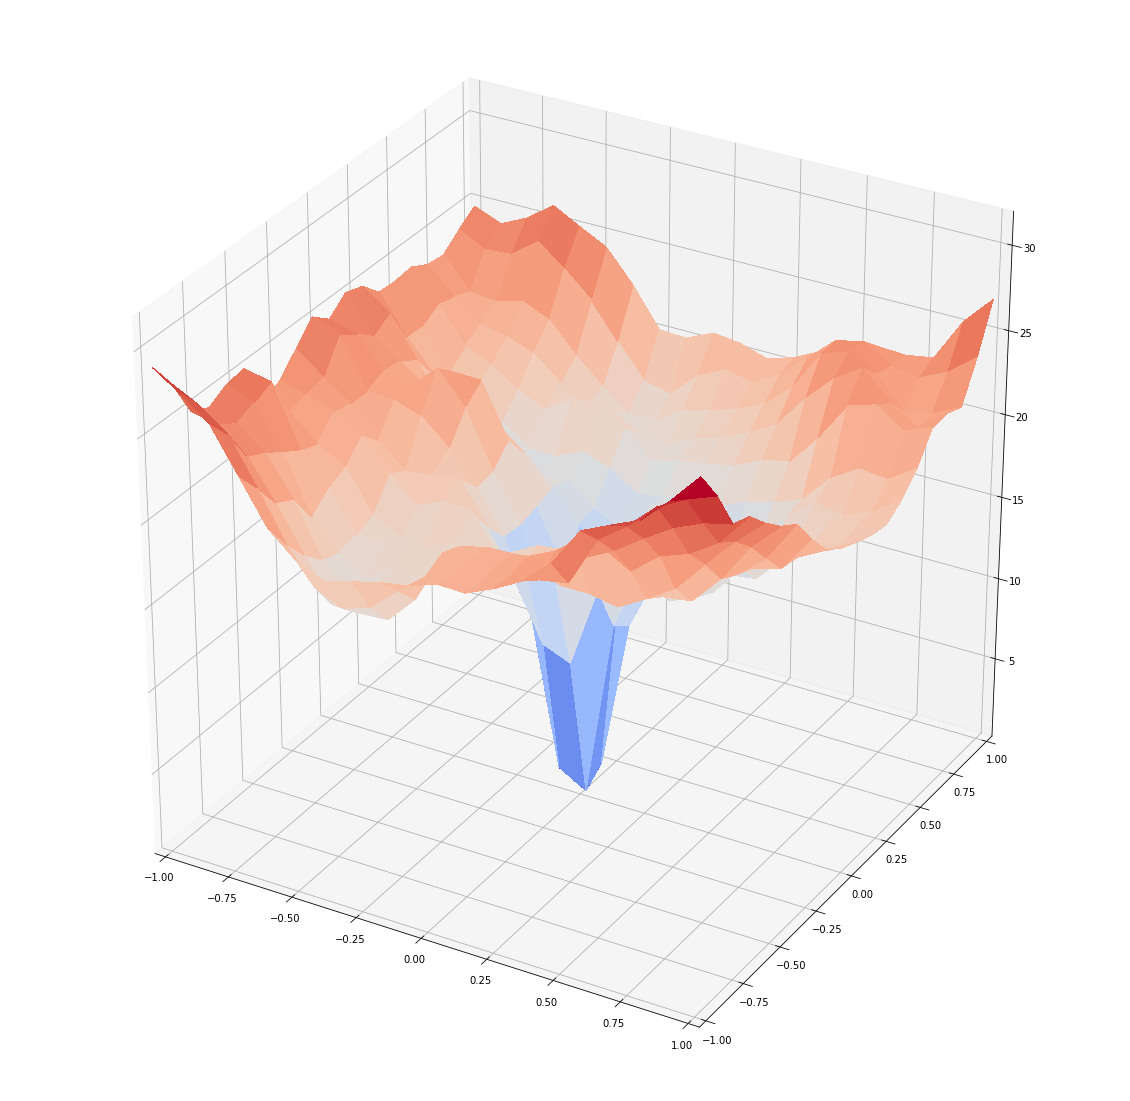

In [ ]:
generate_plots("mobilenet_v2", "imagenetv2", optimizer_name)